In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
ds = pd.read_csv('kc_house_data.csv')
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Basic understand on this dataset 

In [3]:
ds['lat'].describe() 
print(ds['long'].describe())

count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64


In [4]:
ds.shape

(21613, 21)

In [5]:
ds.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
ds['condition'].nunique()

5

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
ds.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# eda

# distribution of price 

np.float64(4.024069144684714)

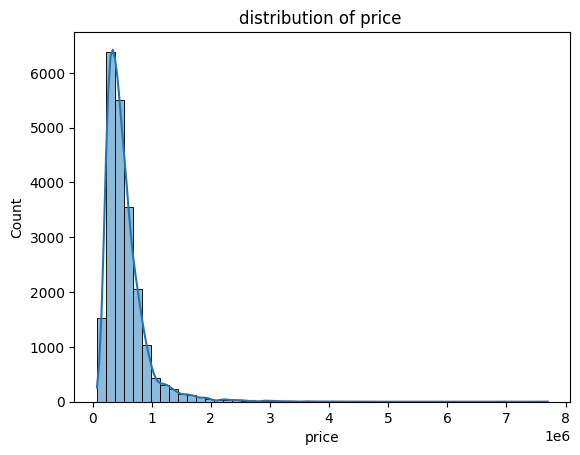

In [9]:
orginal = ds['price']
plt.title('distribution of price ')
sns.histplot(data = ds,x =ds['price'] , bins=50, kde = True)
orginal.skew()

In [10]:
# normall the target using the log fuction 

In [11]:
after = ds['price'] = np.log(ds['price'])
after.skew()

np.float64(0.4280724755759251)

In [12]:
ds['price'].max()

15.856730886823913

<Axes: xlabel='price', ylabel='Count'>

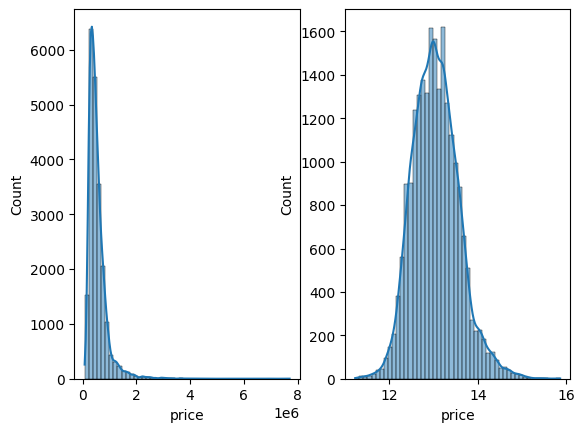

In [13]:
plt.subplot(1,2,1)
sns.histplot(data = ds, x = orginal, bins = 50, kde = True)
plt.subplot(1,2,2)
sns.histplot(data = ds, x= ds['price'], bins = 50 ,kde = True)

# Drop the irrelevent column 

In [14]:
ds.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,12.309982,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


day (price में zero impact)
yr_renovated (mostly 0, useless for model)
sqft_lot (बहुत noisy feature)

In [15]:
ds.drop(columns=['id'] , inplace = True)

In [16]:
ds

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,12.793859,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,12.899220,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,12.904459,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,12.899220,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# feature construction

In [17]:
ds['date'] = pd.to_datetime(ds['date'])
ds['year'] = ds['date'].dt.year
ds['month'] = ds['date'].dt.month
ds.drop(columns='date', inplace=True)

In [18]:
ds

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,12.899220,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,12.904459,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,12.899220,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


# import input feature




| Feature          | Keep / Remove | Reason                           |
| ---------------- | ------------- | -------------------------------- |
| **day**          | ❌ Remove      | No impact on price               |
| **yr_renovated** | ❌ Remove      | Mostly 0 → zero variance feature |
| **sqft_lot**     | ❌ Remove      | Noisy & skewed feature           |
| **sqft_lot15**    | ❌ Remove          | Price पर कम effect + high noise |


In [19]:
ds.drop(columns = ['yr_renovated','sqft_lot','sqft_lot15'], inplace = True)

In [20]:
ds

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,year,month
0,12.309982,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,2014,10
1,13.195614,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,2014,12
2,12.100712,2,1.00,770,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,2015,2
3,13.311329,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,2014,12
4,13.142166,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,3.0,0,0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,2014,5
21609,12.899220,4,2.50,2310,2.0,0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,2015,2
21610,12.904459,2,0.75,1020,2.0,0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2014,6
21611,12.899220,3,2.50,1600,2.0,0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,2015,1


# price comparing on previous year price

In [21]:
ds['year'].nunique()

2

<Axes: xlabel='year', ylabel='price'>

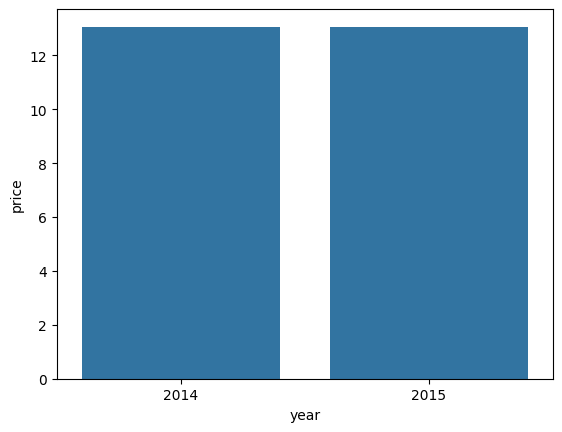

In [22]:
sns.barplot(data = ds, x= ds['year'], y = ds['price'])

# feature enginerring 
* Feature transformation

# Handling the missing values 

In [23]:
# detect the missing values 
ds.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
year             0
month            0
dtype: int64

In [24]:
ds

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,year,month
0,12.309982,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,2014,10
1,13.195614,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,2014,12
2,12.100712,2,1.00,770,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,2015,2
3,13.311329,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,2014,12
4,13.142166,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,3.0,0,0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,2014,5
21609,12.899220,4,2.50,2310,2.0,0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,2015,2
21610,12.904459,2,0.75,1020,2.0,0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2014,6
21611,12.899220,3,2.50,1600,2.0,0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,2015,1


In [25]:
ds.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'year', 'month'],
      dtype='object')

# Handling the outliear

In [26]:
ds_original = ds.copy()

In [27]:
import numpy as np

# num_cols = ds.select_dtypes(include="number").columns
num_cols = ds.drop(columns='price').select_dtypes(include='number').columns

total_outliers = 0

for col in num_cols:
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    ds = ds[(ds[col] >= lower) & (ds[col] <= upper)]

    mask = (ds[col] < lower) | (ds[col] > upper)
    total_outliers += mask.sum()


print("Total Rows:", len(ds))
print("Total Outliers Found:", total_outliers)
print("Rows Removed: 0 (Outliers filled with median value)")

Total Rows: 16424
Total Outliers Found: 0
Rows Removed: 0 (Outliers filled with median value)


# how many outliers are present 

In [28]:
for col in num_cols:
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(col, ((ds[col] < lower) | (ds[col] > upper)).sum())

bedrooms 0
bathrooms 0
sqft_living 64
floors 0
waterfront 0
view 0
condition 0
grade 0
sqft_above 147
sqft_basement 211
yr_built 0
zipcode 0
lat 0
long 39
sqft_living15 53
year 0
month 0


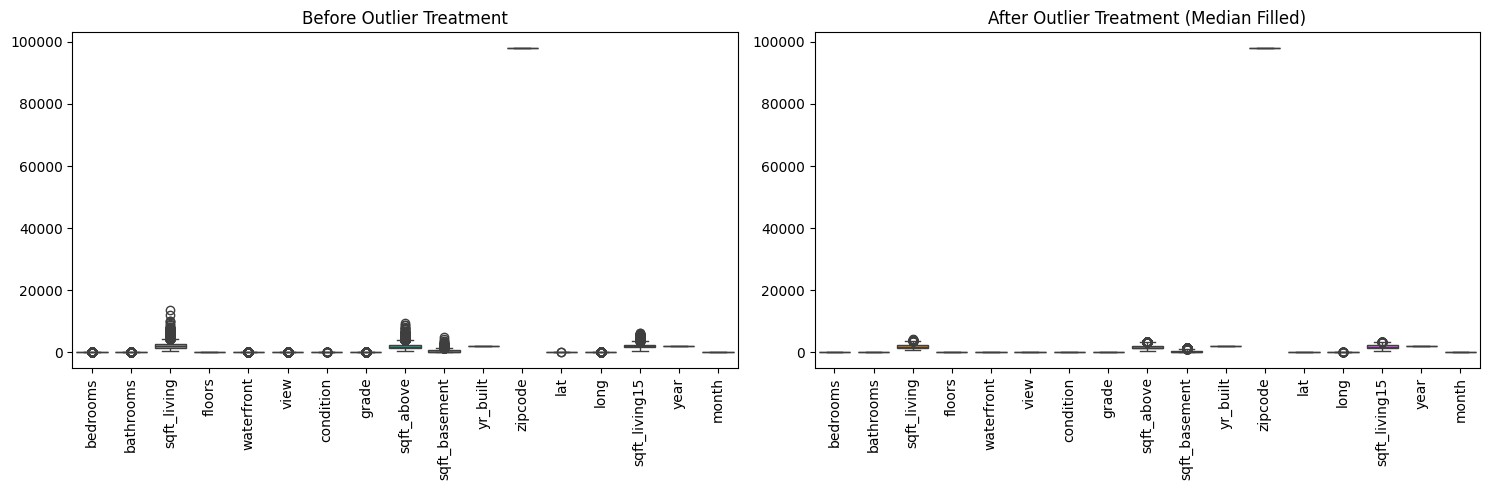

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

# Before
plt.subplot(1,2,1)
sns.boxplot(data=ds_original[num_cols])
plt.title("Before Outlier Treatment")
plt.xticks(rotation=90)

# After
plt.subplot(1,2,2)
sns.boxplot(data=ds[num_cols])
plt.title("After Outlier Treatment (Median Filled)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# encoding 
* In this dataset do not having a object or catagorical data 

In [30]:
ds

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,year,month
0,12.309982,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,2014,10
1,13.195614,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,2014,12
2,12.100712,2,1.00,770,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,2015,2
3,13.311329,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,2014,12
4,13.142166,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,3.0,0,0,3,8,1530,0,2009,98103,47.6993,-122.346,1530,2014,5
21609,12.899220,4,2.50,2310,2.0,0,0,3,8,2310,0,2014,98146,47.5107,-122.362,1830,2015,2
21610,12.904459,2,0.75,1020,2.0,0,0,3,7,1020,0,2009,98144,47.5944,-122.299,1020,2014,6
21611,12.899220,3,2.50,1600,2.0,0,0,3,8,1600,0,2004,98027,47.5345,-122.069,1410,2015,1


In [31]:
ds['sqft_above'].describe()

count    16424.000000
mean      1592.294873
std        581.655674
min        480.000000
25%       1150.000000
50%       1450.000000
75%       1942.500000
max       3260.000000
Name: sqft_above, dtype: float64

# extract the inpute feature and target column 

In [32]:
features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'yr_built',
    'yr_renovated', 'sqft_basement', 'year', 'month', 'day'
]

target_col = ds['price']
input_feature = ds.drop(columns='price')


In [33]:
print(input_feature.shape)
target_col.shape

(16424, 17)


(16424,)

# spliting the data 

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_feature,target_col, test_size=0.2, random_state=42)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13139, 17)
(3285, 17)
(13139,)
(3285,)


# Feature Scalling

In [36]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_test.shape
x_train.shape

In [37]:
# from sklearn.preprocessing import StandardScaler

# sc_x = StandardScaler()
# sc_y = StandardScaler()

# # X scale
# x_train = sc_x.fit_transform(x_train)
# x_test = sc_x.transform(x_test)

# # Y scale (IMPORTANT)
# y_train = sc_y.fit_transform(y_train.values.reshape(-1,1))


# create a model and train 

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# intercept and slope values 

In [39]:
print(lr.intercept_)
print(lr.coef_)

[1.59750051e-15]
[[-5.81381900e-02  1.14663962e-01  1.44772138e-01  9.97487689e-02
   5.55111512e-17  1.38777878e-17  8.45080138e-02  3.25900103e-01
   9.99829509e-02  8.21513908e-02 -2.79387887e-01 -5.77048934e-02
   4.73798665e-01 -1.35710469e-02  1.17498863e-01  6.06868219e-02
   5.26670737e-03]]


In [40]:
# predect

In [41]:
y_pred = lr.predict(x_test)
y_pred

array([[ 0.33872087],
       [-0.88753557],
       [-1.23484118],
       ...,
       [ 0.15826183],
       [-0.40950114],
       [ 0.53969398]], shape=(3285, 1))

# Model evaluation 

# simpal linear regressin 

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)
print(mae)
print(mse)
print(rmse)
print(r2_score)

12.916248501086471
167.10977903936242
12.927094764074504
-955.526565943923


# random forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(x_train, y_train)
pred= model.predict(x_test)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,pred)
print(mae)
print(mse)
print(rmse)
print(r2_score)

12.925902234664383
167.39257082864253
12.938028088879793
-957.1452495459969


# xg bost 

In [44]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor(n_estimators=500 , learning_rate=0.05, max_depth=3,random_state=42)
gbr.fit(x_train,y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [45]:
p = gbr.predict(x_test)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,p)
mse = mean_squared_error(y_test, p)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,p)
print(mae)
print(mse)
print(rmse)
print(r2_score)

0.1177475823279745
0.025578203351110322
0.15993187096732883
0.8535918654485808


In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbr,input_feature,target_col,cv = 5,scoring='r2')
print(scores)

[0.85900697 0.84627226 0.84970103 0.85137679 0.85573432]


# this is the final accuracy

In [48]:
print(scores.mean())

0.8524182746120001


# create a pkl file 

In [49]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(sc, "scaler.pkl")
# joblib.dump(sc, "scaler_y.pkl")

print("Model and both scalers saved successfully!")


Model and both scalers saved successfully!


In [50]:
joblib.dump(model, "model.pkl", compress=("xz", 9))

['model.pkl']

In [ ]:
# import joblib

# joblib.dump(model, "model.pkl")
# joblib.dump(sc_x, "scaler_x.pkl")
# joblib.dump(sc_y, "scaler_y.pkl")

# print("Done!")